## Loading Libraries And Getting Started 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
import warnings as wrn
from scipy.stats.mstats import winsorize
import wrds

### Getting and viewing the data

In [3]:
df = pd.read_pickle('final_task_bad_data.pickle')

In [4]:
df.shape

(502, 5)

In [5]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
df.head()

Open        High         Low       Close  \
Date                                                                        
2022-02-17 00:00:00-05:00  154.187493  154.855315  152.114248  152.453140   
2022-02-18 00:00:00-05:00  152.413269  153.180757  149.562559  150.868301   
2022-02-22 00:00:00-05:00  149.702101  150.300143  147.130481  147.608917   
2022-02-23 00:00:00-05:00  149.014346  149.253572  145.027340  145.396133   
2022-02-24 00:00:00-05:00  139.545215  149.084134  139.545215  148.914673   

                               Volume  
Date                                   
2022-02-17 00:00:00-05:00   8110300.0  
2022-02-18 00:00:00-05:00  10785500.0  
2022-02-22 00:00:00-05:00  12227200.0  
2022-02-23 00:00:00-05:00   9300700.0  
2022-02-24 00:00:00-05:00  12475500.0

In [8]:
df.describe()

Open        High         Low        Close        Volume
count  502.000000  502.000000  502.000000   502.000000  5.010000e+02
mean    99.826219  101.003504   98.613673   138.813084  1.290093e+07
std     15.033235   15.250139   14.678095   624.452058  7.460270e+06
min     78.843041   79.530799   78.474245   -20.000000  5.426100e+06
25%     90.092497   90.995822   89.343816    90.181091  8.900900e+06
50%     96.002118   97.361360   94.801034    95.757915  1.125760e+07
75%    106.378302  107.644175  104.501919   106.261181  1.420600e+07
max    154.187493  154.855315  152.114248  9999.000000  7.027350e+07

### Finding and handeling outliers 

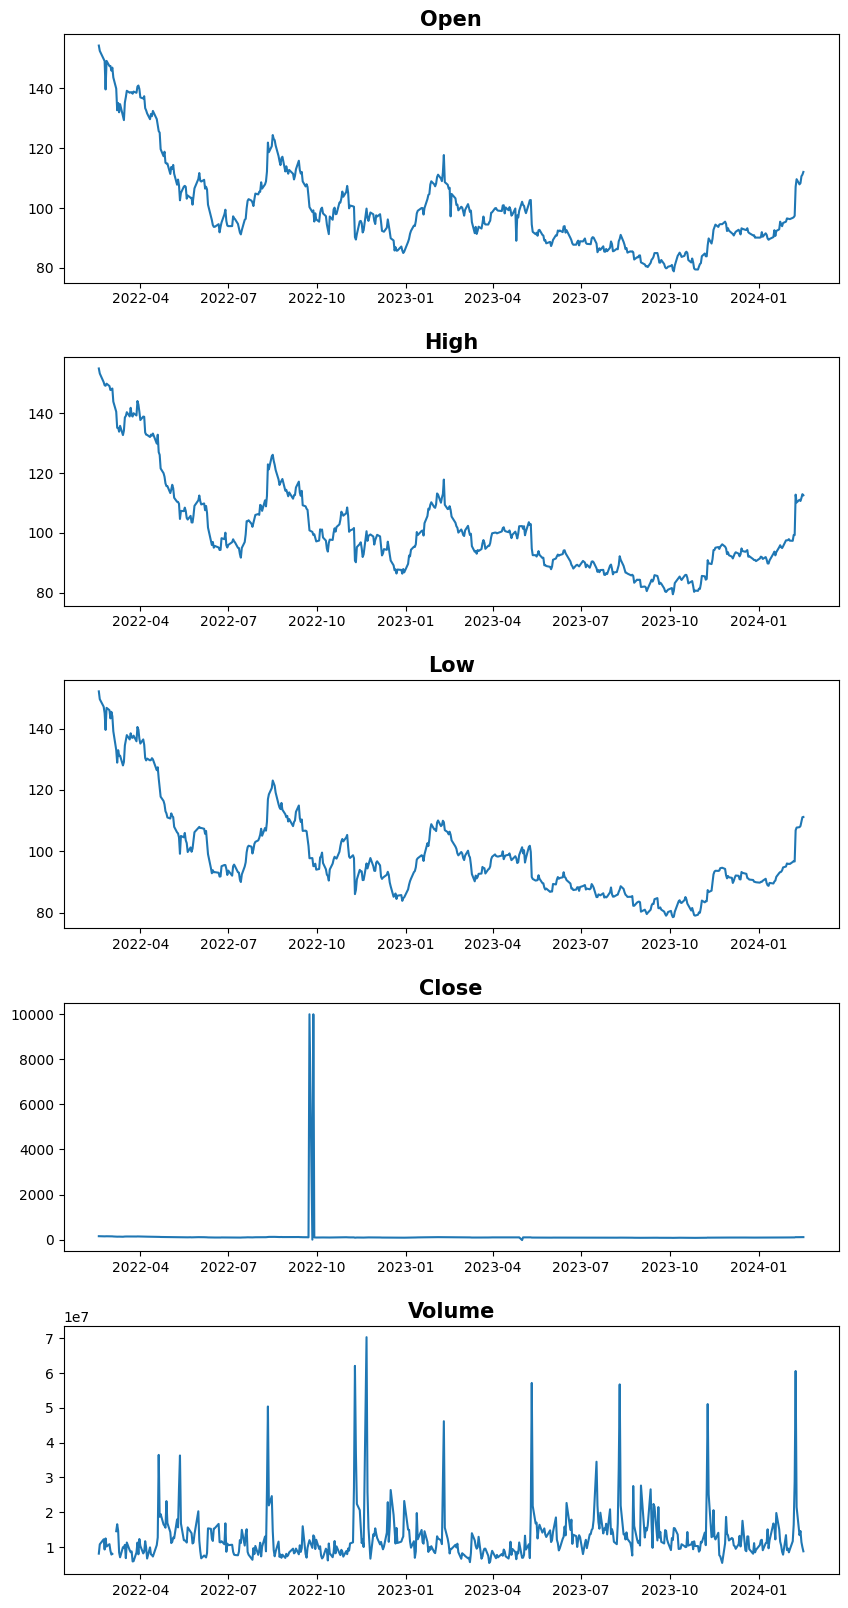

In [9]:
fig, ax = plt.subplots(nrows = 5, figsize = (10, 20))
plt.subplots_adjust(hspace = 0.3)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
ax[0].plot(df['Open'])
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
ax[1].plot(df['High'])
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
ax[2].plot(df['Low'])
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
ax[3].plot(df['Close'])
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)
ax[4].plot(df['Volume'])

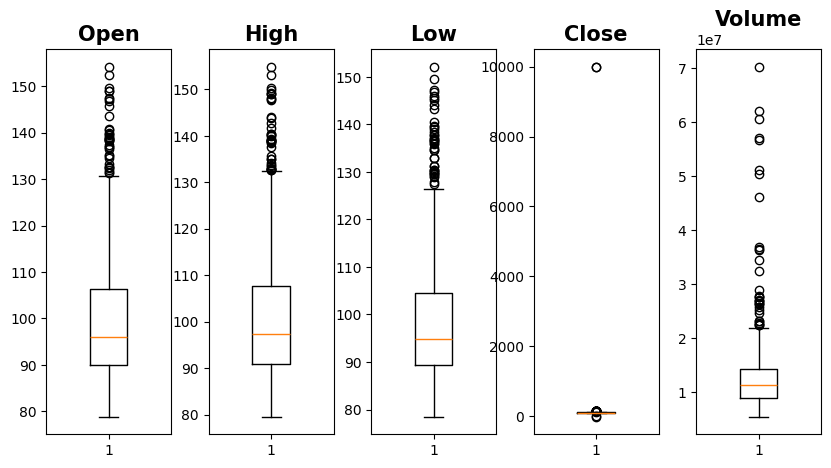

In [10]:
fig, ax = plt.subplots(ncols = 5, figsize = (10, 5))
plt.subplots_adjust(wspace = 0.3)
ax[0].boxplot(df['Open'].dropna(),widths = 0.3)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
ax[1].boxplot(df['High'].dropna(),widths = 0.3)
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
ax[2].boxplot(df['Low'].dropna(),widths = 0.3)
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
ax[3].boxplot(df['Close'].dropna(),widths = 0.3)
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
ax[4].boxplot(df['Volume'].dropna(),widths = 0.3)
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)

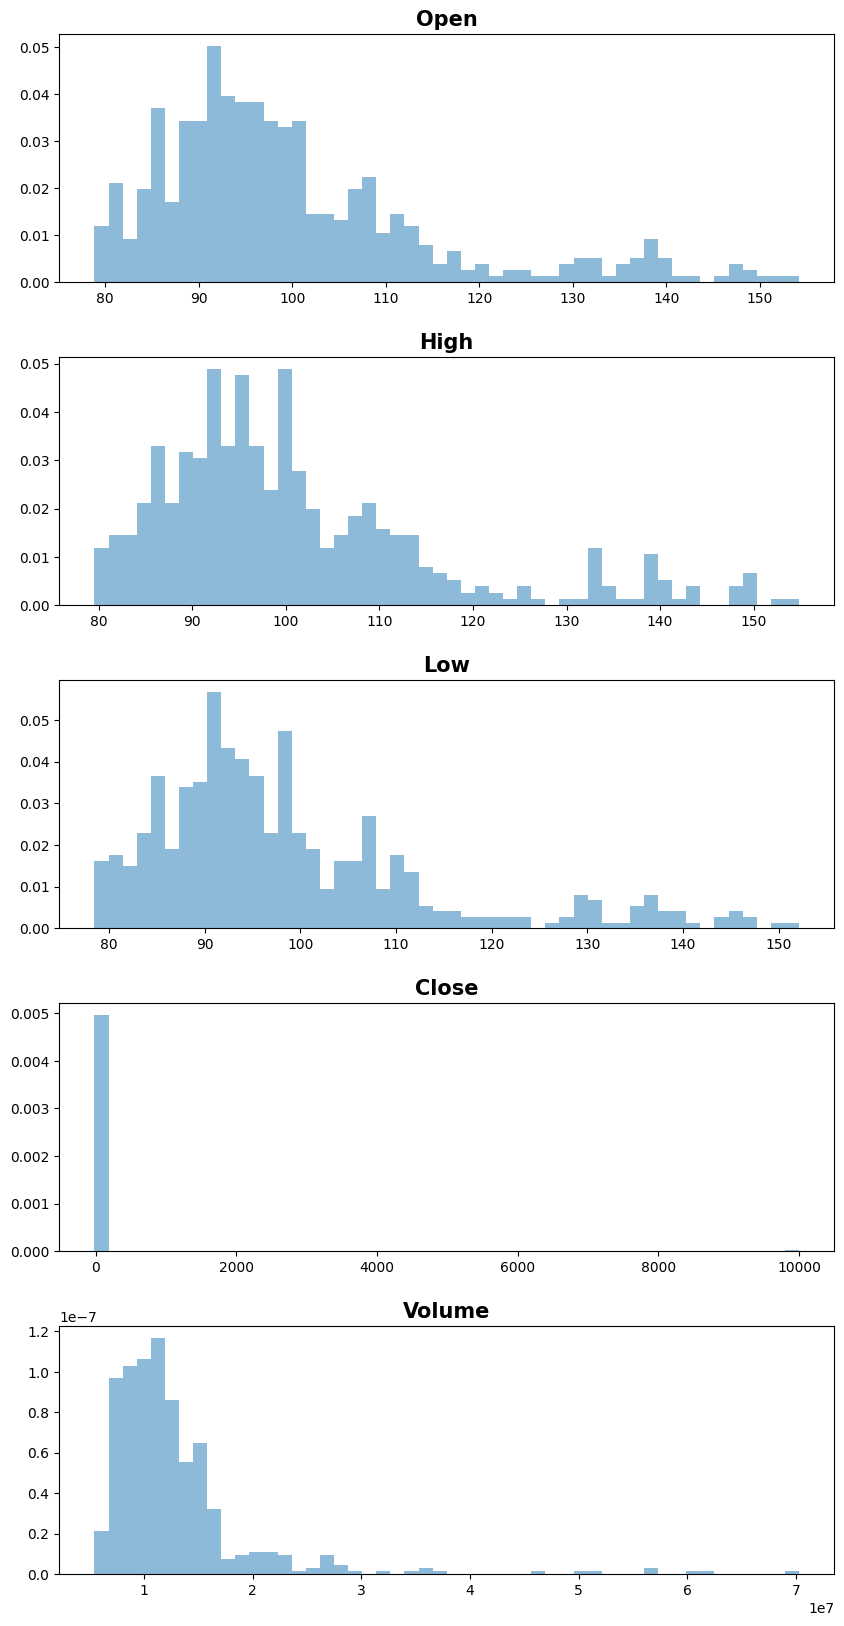

In [11]:
fig, ax = plt.subplots(nrows = 5, figsize = (10, 20))
plt.subplots_adjust(hspace = 0.3)
ax[0].hist(df['Open'], bins = 50, density = True, alpha = 0.5)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
ax[1].hist(df['High'], bins = 50, density = True, alpha = 0.5)
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
ax[2].hist(df['Low'], bins = 50, density = True, alpha = 0.5)
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
ax[3].hist(df['Close'], bins = 50, density = True, alpha = 0.5)
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
ax[4].hist(df['Volume'], bins = 50, density = True, alpha = 0.5)
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)

In [12]:
def calc_outliers_customizable(srs: pd.Series, lowBoundPrcnt = 0.25, highBoundPrcnt = 0.75, BoundDistCoef = 1.5) -> Tuple[pd.Series, pd.array]:
    q1 = srs.quantile(lowBoundPrcnt)
    q3 = srs.quantile(highBoundPrcnt)
    iqr = q3 - q1
    lower_bound = q1 - BoundDistCoef * iqr
    upper_bound = q3 + BoundDistCoef * iqr
    is_outliers = (srs < lower_bound) | (srs > upper_bound)
    outliers = srs[is_outliers]
    return outliers, is_outliers

In [13]:
outliersOpen, is_outliersOpen = calc_outliers_customizable(df['Open'])
print(f'Amount of outliers in Open column: {outliersOpen.count()}')
outliersHigh, is_outliersHigh = calc_outliers_customizable(df['High'])
print(f'Amount of outliers in High column: {outliersHigh.count()}')
outliersLow, is_outliersLow = calc_outliers_customizable(df['Low'])
print(f'Amount of outliers in Low column: {outliersLow.count()}')
outliersClose, is_outliersClose = calc_outliers_customizable(df['Close'])
print(f'Amount of outliers in Close column: {outliersClose.count()}')
outliersVolume, is_outliersVolume = calc_outliers_customizable(df['Volume'])
print(f'Amount of outliers in Volume column: {outliersVolume.count()}')
print()

is_outliersOverall = sum([is_outliersOpen, is_outliersHigh, is_outliersLow, is_outliersClose, is_outliersVolume])
print(f'Amount of rows with at least 1 outlier: {is_outliersOverall.apply(lambda x: 1 if x>=1 else 0).sum()}')
print(f'Amount of rows with at least 2 outliers: {is_outliersOverall.apply(lambda x: 1 if x>=2 else 0).sum()}')
print(f'Amount of rows with at least 3 outliers: {is_outliersOverall.apply(lambda x: 1 if x>=3 else 0).sum()}')
print(f'Amount of rows with at least 4 outliers: {is_outliersOverall.apply(lambda x: 1 if x>=4 else 0).sum()}')
print(f'Amount of rows with at least 5 outliers: {is_outliersOverall.apply(lambda x: 1 if x>=5 else 0).sum()}')

Amount of outliers in Open column: 36
Amount of outliers in High column: 39
Amount of outliers in Low column: 41
Amount of outliers in Close column: 42
Amount of outliers in Volume column: 32

Amount of rows with at least 1 outlier: 77
Amount of rows with at least 2 outliers: 40
Amount of rows with at least 3 outliers: 38
Amount of rows with at least 4 outliers: 35
Amount of rows with at least 5 outliers: 0


In [14]:
wrn.filterwarnings('ignore')
is_outliersAtLeast = is_outliersOverall>0
dates = is_outliersAtLeast[is_outliersAtLeast].index
diffs = dates.to_series().diff().dt.days
diffs = diffs[diffs.isna() == False]

outliersDiffs, is_outliersDiffs = calc_outliers_customizable(diffs)

print(f'Average time difference between outliers: {diffs.mean()} days')
print(f'Average time difference between outliers (excluding theire outliers): {diffs[~is_outliersDiffs].mean()} days')

Average time difference between outliers: 9.460526315789474 days
Average time difference between outliers (excluding theire outliers): 2.129032258064516 days


In [15]:
is_illogical = (df['High'] < df['Low']) | (df['High'] < df['Open']) | (df['High'] < df['Close']) | (df['Low'] > df['Open']) | (df['Low'] > df['Close'])
is_illogical = is_illogical.to_frame("is_illogical")

print(f'there are {is_illogical.sum()} rows with illogical values')

there are is_illogical    6
dtype: int64 rows with illogical values


In [16]:
df[is_illogical.is_illogical]

Open        High         Low        Close  \
Date                                                                         
2022-09-23 00:00:00-04:00  100.293137  100.851316   97.701578  9999.000000   
2022-09-26 00:00:00-04:00   98.628560  100.333012   97.741452     0.000000   
2022-09-27 00:00:00-04:00   99.206673   99.316317   95.119994  9999.000000   
2023-02-16 00:00:00-05:00   97.200627  107.669094  105.356631   105.486214   
2023-04-25 00:00:00-04:00   89.057157   99.386087   97.691612    97.691612   
2023-05-01 00:00:00-04:00  102.077323  102.276670  101.279918   -20.000000   

                               Volume  
Date                                   
2022-09-23 00:00:00-04:00  11976900.0  
2022-09-26 00:00:00-04:00   9760500.0  
2022-09-27 00:00:00-04:00  13360200.0  
2023-02-16 00:00:00-05:00   9479900.0  
2023-04-25 00:00:00-04:00   6511400.0  
2023-05-01 00:00:00-04:00   6909500.0

### marking rows according to the illogical values they have

In [17]:
is_illogical["Close_fix_needed"] = df.Close == df.Close.apply(np.floor)
is_illogical["Low_fix_needed"] = ((df.Low > df.Close) | (df.Low > df.Open)) & (is_illogical.Close_fix_needed == False)
is_illogical[is_illogical.is_illogical]

is_illogical  Close_fix_needed  Low_fix_needed
Date                                                                     
2022-09-23 00:00:00-04:00          True              True           False
2022-09-26 00:00:00-04:00          True              True           False
2022-09-27 00:00:00-04:00          True              True           False
2023-02-16 00:00:00-05:00          True             False            True
2023-04-25 00:00:00-04:00          True             False            True
2023-05-01 00:00:00-04:00          True              True           False

### mark rows to drop and set appropriate values for Close and row

In [18]:
is_illogical["to_drop"] = False
count = 0
for i in is_illogical.index:
    if is_illogical.Close_fix_needed[i]:
        if count%2 == 0:
            is_illogical.to_drop[i] = True
        else:
            df.Close[i] = None
        count += 1
    else:
        count = 0
    if is_illogical.Low_fix_needed[i]:
        df.Low[i] = min(df.Close[i], df.Open[i])

# drop rows that were marked
df = df[~is_illogical.to_drop]
is_illogical = is_illogical[~is_illogical.to_drop]
is_illogical = is_illogical.drop(columns = "to_drop")

In [19]:
df.isna().sum()

Open      0
High      0
Low       0
Close     1
Volume    1
dtype: int64

In [20]:
df[df.Close.isna()].isna().sum()

Open      0
High      0
Low       0
Close     1
Volume    0
dtype: int64

In [21]:
df[df.Volume.isna()].isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    1
dtype: int64

In [22]:
aroundOpen = (df['Open'] == 0) & False
aroundHigh = (df['High'] == 0) & False
aroundLow = (df['Low'] == 0) & False
aroundClose = (df['Close'] == 0) & False
aroundVolume = (df['Volume'] == 0) & False
for i in df.index[df.isna().any(axis = 1)]:
    columnSds = df.loc[df.index[0]:i,:].std()
    naCol = df.columns[df.loc[i].isna()]
    if naCol[0] != 'Open': aroundOpen = (df['Open'] <= df.loc[i,'Open'] + columnSds['Open']) & (df['Open'] >= df.loc[i,'Open'] - columnSds['Open']) & (df.index <= i)
    if naCol[0] != 'High': aroundHigh = (df['High'] <= df.loc[i,'High'] + columnSds['High']) & (df['High'] >= df.loc[i,'High'] - columnSds['High']) & (df.index <= i)
    if naCol[0] != 'Low': aroundLow = (df['Low'] <= df.loc[i,'Low'] + columnSds['Low']) & (df['Low'] >= df.loc[i,'Low'] - columnSds['Low']) & (df.index <= i)
    if naCol[0] != 'Close': aroundClose = (df['Close'] <= df.loc[i,'Close'] + columnSds['Close']) & (df['Close'] >= df.loc[i,'Close'] - columnSds['Close']) & (df.index <= i)
    if naCol[0] != 'Volume': aroundVolume = (df['Volume'] <= df.loc[i,'Volume'] + columnSds['Volume']) & (df['Volume'] >= df.loc[i,'Volume'] - columnSds['Volume']) & (df.index <= i)
    rows_to_use = (aroundOpen if naCol[0] != 'Open' else True) & (aroundHigh if naCol[0] != 'High' else True) & (aroundLow if naCol[0] != 'Low' else True) & (aroundClose if naCol[0] != 'Close' else True) & (aroundVolume if naCol[0] != 'Volume' else True) & (df.loc[i, naCol[0]] != None)
    if rows_to_use.sum() > 1:
        df.loc[i,naCol[0]] = df[rows_to_use][naCol[0]].median()
    else:
        df.loc[i,naCol[0]] = df[df.index<= i][naCol[0]].median()

In [23]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [24]:
alpha = 0.05
beta = 0.05
df['Open'] = winsorize(df['Open'], limits = [alpha, beta])
df['High'] = winsorize(df['High'], limits = [alpha, beta])
df['Low'] = winsorize(df['Low'], limits = [alpha, beta])
df['Close'] = winsorize(df['Close'], limits = [alpha, beta])
df['Volume'] = winsorize(df['Volume'], limits = [alpha, beta])

### Now let's look at the graphs after we hadelded the data

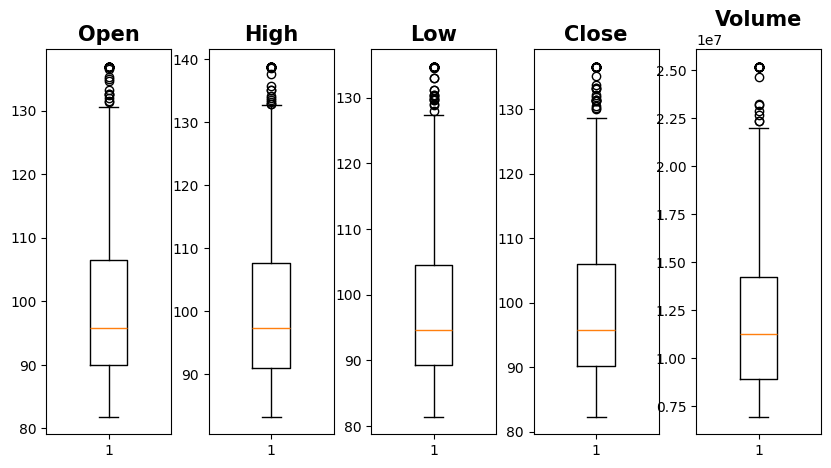

In [25]:
fig, ax = plt.subplots(ncols = 5, figsize = (10, 5))
plt.subplots_adjust(wspace = 0.3)
ax[0].boxplot(df['Open'].dropna(),widths = 0.3)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
ax[1].boxplot(df['High'].dropna(),widths = 0.3)
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
ax[2].boxplot(df['Low'].dropna(),widths = 0.3)
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
ax[3].boxplot(df['Close'].dropna(),widths = 0.3)
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
ax[4].boxplot(df['Volume'].dropna(),widths = 0.3)
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)

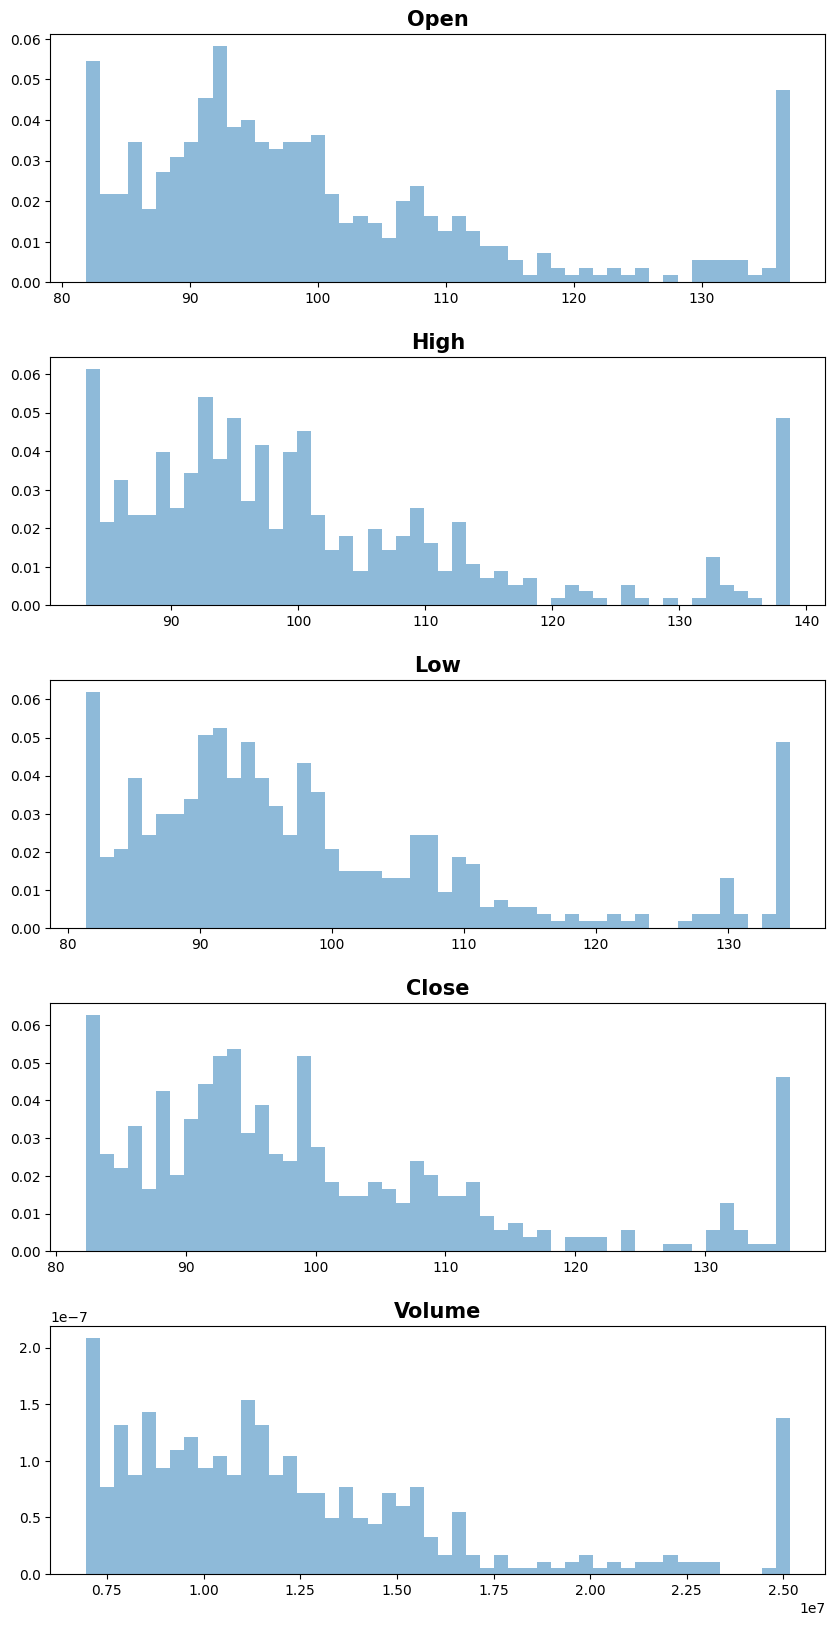

In [26]:
fig, ax = plt.subplots(nrows = 5, figsize = (10, 20))
plt.subplots_adjust(hspace = 0.3)
ax[0].hist(df['Open'], bins = 50, density = True, alpha = 0.5)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
ax[1].hist(df['High'], bins = 50, density = True, alpha = 0.5)
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
ax[2].hist(df['Low'], bins = 50, density = True, alpha = 0.5)
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
ax[3].hist(df['Close'], bins = 50, density = True, alpha = 0.5)
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
ax[4].hist(df['Volume'], bins = 50, density = True, alpha = 0.5)
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)

In [27]:
conn = wrds.Connection()

In [28]:
start_date = '2018-01-01'
end_date = '2020-04-01'
symbol = 'ANF' # Abercrombie & Fitch Ticker/Symbol
ANFData = conn.raw_sql(f"""SELECT c.date AS Date,
                                c.permco AS company_code,
                                c.permno AS security_code,
                                i.ticker AS symbol,
                                c.openprc AS Open, 
                                c.askhi AS High,
                                c.bidlo AS Low, 
                                c.prc AS Close, 
                                c.vol AS Volume,
                                c.cfacpr AS splits_adjustment_factor,
                                d.divamt AS Dividend,
                                i.uesindustry AS industry
                            FROM crsp.dsf c JOIN crsp.stksecurityinfohdr i ON c.permno = i.permno
                                LEFT JOIN crsp.dse d ON c.permno = d.permno AND c.date = d.date
                            WHERE c.date >= '{start_date}' AND c.date <= '{end_date}' AND i.ticker = '{symbol}'
                        """, date_cols=['Date'])

'start_date = \'2018-01-01\'\nend_date = \'2020-04-01\'\nsymbol = \'ANF\' # Abercrombie & Fitch Ticker/Symbol\nANFData = conn.raw_sql(f"""SELECT c.date AS Date,\n                                c.permco AS company_code,\n                                c.permno AS security_code,\n                                i.ticker AS symbol,\n                                c.openprc AS Open, \n                                c.askhi AS High,\n                                c.bidlo AS Low, \n                                c.prc AS Close, \n                                c.vol AS Volume,\n                                c.cfacpr AS splits_adjustment_factor,\n                                d.divamt AS Dividend,\n                                i.uesindustry AS industry\n                            FROM crsp.dsf c JOIN crsp.stksecurityinfohdr i ON c.permno = i.permno\n                                LEFT JOIN crsp.dse d ON c.permno = d.permno AND c.date = d.date\n                            WHER

### Let's take a first look at our data

In [30]:
ANFData

date  company_code  security_code symbol   open    high      low  \
0    2018-01-02         22200          83976    ANF  17.64  18.300  17.5100   
1    2018-01-03         22200          83976    ANF  18.30  18.590  18.1300   
2    2018-01-04         22200          83976    ANF  18.41  18.550  17.0400   
3    2018-01-05         22200          83976    ANF  18.20  18.540  17.9900   
4    2018-01-08         22200          83976    ANF  18.41  18.555  17.9507   
..          ...           ...            ...    ...    ...     ...      ...   
561  2020-03-26         22200          83976    ANF   9.71  10.620   9.1000   
562  2020-03-27         22200          83976    ANF   9.40  10.100   9.0000   
563  2020-03-30         22200          83976    ANF   9.80   9.800   9.1400   
564  2020-03-31         22200          83976    ANF   9.31   9.585   8.7600   
565  2020-04-01         22200          83976    ANF   8.47   8.490   8.0300   

     close     volume  splits_adjustment_factor  dividend industry  
0    18.20  2275956.0                       1.0       NaN   CONDIS  
1    18.53  2112677.0                       1.0       NaN   CONDIS  
2    18.20  3580819.0                       1.0       NaN   CONDIS  
3    18.28  2288929.0                       1.0       NaN   CONDIS  
4    18.31  2417879.0                       1.0       NaN   CONDIS  
..     ...        ...                       ...       ...      ...  
561  10.00  5052422.0                       1.0       NaN   CONDIS  
562   9.91  3034780.0                       1.0       NaN   CONDIS  
563   9.31  1588860.0                       1.0       NaN   CONDIS  
564   9.09  2346424.0                       1.0       NaN   CONDIS  
565   8.17  2383085.0                       1.0       NaN   CONDIS  

[566 rows x 12 columns]

In [31]:
ANFData[ANFData['dividend'].isna() == 0]

date  company_code  security_code symbol   open   high    low  \
45   2018-03-08         22200          83976    ANF  23.72  23.79  22.22   
108  2018-06-07         22200          83976    ANF  25.34  25.85  24.50   
171  2018-09-06         22200          83976    ANF  22.30  22.52  21.22   
234  2018-12-06         22200          83976    ANF  18.79  19.65  18.47   
295  2019-03-07         22200          83976    ANF  25.75  26.50  25.34   
358  2019-06-06         22200          83976    ANF  16.20  16.28  15.32   
421  2019-09-05         22200          83976    ANF  14.75  15.56  14.73   
485  2019-12-05         22200          83976    ANF  16.98  17.06  16.61   
546  2020-03-05         22200          83976    ANF  13.29  13.30  11.60   

     close     volume  splits_adjustment_factor  dividend industry  
45   22.35  7520386.0                       1.0       0.2   CONDIS  
108  24.55  3297035.0                       1.0       0.2   CONDIS  
171  21.29  3512426.0                       1.0       0.2   CONDIS  
234  19.32  4326998.0                       1.0       0.2   CONDIS  
295  25.76  6174979.0                       1.0       0.2   CONDIS  
358  15.76  3943243.0                       1.0       0.2   CONDIS  
421  15.42  3930040.0                       1.0       0.2   CONDIS  
485  16.68  1868419.0                       1.0       0.2   CONDIS  
546  11.67  6842556.0                       1.0       0.2   CONDIS

### Looks like we have NAs instead of 0's in the dividend column

In [32]:
ANFData.dividend.fillna(0, inplace = True)

### Calculate the DIR and the CDIR for each day

In [33]:
ANFData['DIR'] = (1-(ANFData['dividend']/ANFData['close']).abs())

In [34]:
ANFData.sort_values(by='date', ascending = False, inplace=True)
ANFData['CDIR'] = ANFData['DIR'].cumprod()
ANFData.sort_values(by='date', ascending = True, inplace=True)

In [35]:
ANFData['Adjusted Close'] = (ANFData['close'] * ANFData['CDIR'])/ANFData['splits_adjustment_factor']
ANFData

date  company_code  security_code symbol   open    high      low  \
0    2018-01-02         22200          83976    ANF  17.64  18.300  17.5100   
1    2018-01-03         22200          83976    ANF  18.30  18.590  18.1300   
2    2018-01-04         22200          83976    ANF  18.41  18.550  17.0400   
3    2018-01-05         22200          83976    ANF  18.20  18.540  17.9900   
4    2018-01-08         22200          83976    ANF  18.41  18.555  17.9507   
..          ...           ...            ...    ...    ...     ...      ...   
561  2020-03-26         22200          83976    ANF   9.71  10.620   9.1000   
562  2020-03-27         22200          83976    ANF   9.40  10.100   9.0000   
563  2020-03-30         22200          83976    ANF   9.80   9.800   9.1400   
564  2020-03-31         22200          83976    ANF   9.31   9.585   8.7600   
565  2020-04-01         22200          83976    ANF   8.47   8.490   8.0300   

     close     volume  splits_adjustment_factor  dividend industry  DIR  \
0    18.20  2275956.0                       1.0       0.0   CONDIS  1.0   
1    18.53  2112677.0                       1.0       0.0   CONDIS  1.0   
2    18.20  3580819.0                       1.0       0.0   CONDIS  1.0   
3    18.28  2288929.0                       1.0       0.0   CONDIS  1.0   
4    18.31  2417879.0                       1.0       0.0   CONDIS  1.0   
..     ...        ...                       ...       ...      ...  ...   
561  10.00  5052422.0                       1.0       0.0   CONDIS  1.0   
562   9.91  3034780.0                       1.0       0.0   CONDIS  1.0   
563   9.31  1588860.0                       1.0       0.0   CONDIS  1.0   
564   9.09  2346424.0                       1.0       0.0   CONDIS  1.0   
565   8.17  2383085.0                       1.0       0.0   CONDIS  1.0   

         CDIR  Adjusted Close  
0    0.904852       16.468313  
1    0.904852       16.766914  
2    0.904852       16.468313  
3    0.904852       16.540701  
4    0.904852       16.567847  
..        ...             ...  
561  1.000000       10.000000  
562  1.000000        9.910000  
563  1.000000        9.310000  
564  1.000000        9.090000  
565  1.000000        8.170000  

[566 rows x 15 columns]

### Now let's compare the results with Yahoo Finance

In [36]:
# Bringing comparison data
ANFyahoo = pd.read_csv('ANFyahoo.csv')

In [37]:
ANFyahoo['DIR'] = (1-(ANFData['dividend']/ANFData['close']).abs())

In [38]:
ANFyahoo.sort_values(by='Date', ascending = False, inplace=True)
ANFyahoo['CDIR'] = ANFData['DIR'].cumprod()
ANFyahoo.sort_values(by='Date', ascending = True, inplace=True)

In [39]:
ANFyahoo.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
DIR          float64
CDIR         float64
dtype: object

### We need the Date column as datetime because we order the data chronologicaly

In [40]:
ANFyahoo['Date'] = ANFyahoo.Date.astype('datetime64[ns]')

In [41]:
ANFyahoo.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
DIR                 float64
CDIR                float64
dtype: object

In [42]:
ANFyahoo.sort_values(by='Date', ascending = False, inplace=True)
ANFyahoo['CDIR'] = ANFyahoo['DIR'].cumprod()
ANFyahoo.sort_values(by='Date', ascending = True, inplace=True)

In [43]:
ANFyahoo['Adjusted Close My Calc'] = (ANFyahoo['Close'] * ANFyahoo['CDIR'])
ANFyahoo['Adjusted Close Gap'] = (ANFyahoo['Adj Close'] - ANFyahoo['Adjusted Close My Calc']).abs()

In [44]:
ANFyahoo

Date       Open       High        Low      Close  Adj Close  \
0   2018-01-02  17.639999  18.299999  17.510000  18.200001  16.532631   
1   2018-01-03  18.299999  18.590000  18.129999  18.530001  16.832397   
2   2018-01-04  18.410000  18.549999  17.040001  18.200001  16.532631   
3   2018-01-05  18.200001  18.540001  17.990000  18.280001  16.605297   
4   2018-01-08  18.410000  18.559999  17.950001  18.309999  16.632549   
..         ...        ...        ...        ...        ...        ...   
560 2020-03-25   9.190000   9.690000   8.790000   9.470000   9.470000   
561 2020-03-26   9.710000  10.620000   9.100000  10.000000  10.000000   
562 2020-03-27   9.400000  10.100000   9.000000   9.910000   9.910000   
563 2020-03-30   9.800000   9.800000   9.140000   9.310000   9.310000   
564 2020-03-31   9.310000   9.590000   8.760000   9.090000   9.090000   

      Volume  DIR      CDIR  Adjusted Close My Calc  Adjusted Close Gap  
0    2276000  1.0  0.904852               16.468314            0.064317  
1    2112700  1.0  0.904852               16.766915            0.065482  
2    3580800  1.0  0.904852               16.468314            0.064317  
3    2288900  1.0  0.904852               16.540702            0.064595  
4    2417900  1.0  0.904852               16.567846            0.064703  
..       ...  ...       ...                     ...                 ...  
560  3872600  1.0  1.000000                9.470000            0.000000  
561  5050400  1.0  1.000000               10.000000            0.000000  
562  3034800  1.0  1.000000                9.910000            0.000000  
563  1588800  1.0  1.000000                9.310000            0.000000  
564  2346400  1.0  1.000000                9.090000            0.000000  

[565 rows x 11 columns]

### Now let's calculate at the same way the rest of the adjusted values

In [46]:
ANFData['Adjusted Open'] = (ANFData['open'] * ANFData['CDIR'])/ANFData['splits_adjustment_factor']
ANFData['Adjusted High'] = (ANFData['high'] * ANFData['CDIR'])/ANFData['splits_adjustment_factor']
ANFData['Adjusted Low'] = (ANFData['low'] * ANFData['CDIR'])/ANFData['splits_adjustment_factor']
ANFData

date  company_code  security_code symbol   open    high      low  \
0    2018-01-02         22200          83976    ANF  17.64  18.300  17.5100   
1    2018-01-03         22200          83976    ANF  18.30  18.590  18.1300   
2    2018-01-04         22200          83976    ANF  18.41  18.550  17.0400   
3    2018-01-05         22200          83976    ANF  18.20  18.540  17.9900   
4    2018-01-08         22200          83976    ANF  18.41  18.555  17.9507   
..          ...           ...            ...    ...    ...     ...      ...   
561  2020-03-26         22200          83976    ANF   9.71  10.620   9.1000   
562  2020-03-27         22200          83976    ANF   9.40  10.100   9.0000   
563  2020-03-30         22200          83976    ANF   9.80   9.800   9.1400   
564  2020-03-31         22200          83976    ANF   9.31   9.585   8.7600   
565  2020-04-01         22200          83976    ANF   8.47   8.490   8.0300   

     close     volume  splits_adjustment_factor  dividend industry  DIR  \
0    18.20  2275956.0                       1.0       0.0   CONDIS  1.0   
1    18.53  2112677.0                       1.0       0.0   CONDIS  1.0   
2    18.20  3580819.0                       1.0       0.0   CONDIS  1.0   
3    18.28  2288929.0                       1.0       0.0   CONDIS  1.0   
4    18.31  2417879.0                       1.0       0.0   CONDIS  1.0   
..     ...        ...                       ...       ...      ...  ...   
561  10.00  5052422.0                       1.0       0.0   CONDIS  1.0   
562   9.91  3034780.0                       1.0       0.0   CONDIS  1.0   
563   9.31  1588860.0                       1.0       0.0   CONDIS  1.0   
564   9.09  2346424.0                       1.0       0.0   CONDIS  1.0   
565   8.17  2383085.0                       1.0       0.0   CONDIS  1.0   

         CDIR  Adjusted Close  Adjusted Open  Adjusted High  Adjusted Low  
0    0.904852       16.468313      15.961596      16.558798     15.843965  
1    0.904852       16.766914      16.558798      16.821206     16.404973  
2    0.904852       16.468313      16.658332      16.785011     15.418684  
3    0.904852       16.540701      16.468313      16.775963     16.278294  
4    0.904852       16.567847      16.658332      16.789536     16.242733  
..        ...             ...            ...            ...           ...  
561  1.000000       10.000000       9.710000      10.620000      9.100000  
562  1.000000        9.910000       9.400000      10.100000      9.000000  
563  1.000000        9.310000       9.800000       9.800000      9.140000  
564  1.000000        9.090000       9.310000       9.585000      8.760000  
565  1.000000        8.170000       8.470000       8.490000      8.030000  

[566 rows x 18 columns]